In [12]:
#Imports:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [13]:
#Reading in Data
data_ANN = pd.read_csv('GoldWeekly2001-2021.csv')

data_ANN = data_ANN.drop('Did_Win', axis=1)
data_ANN = data_ANN.drop('Volume', axis=1)

for i in range(len(data_ANN)):
    if data_ANN.iloc[i,-1] == 0:
        continue
    else:
        data_ANN.iloc[i,-1] = data_ANN.iloc[i,-1] / data_ANN.iloc[i,-2] * 100

data_ANN.head(n=4)

,Date,Open,High,Low,Close,Profit
0,1/1/2001,268.399994,268.399994,267.299988,268.000000,-1.529853
1,1/8/2001,268.000000,268.000000,263.899994,263.899994,0.151570
2,1/15/2001,263.299988,264.299988,263.200012,264.299988,-0.567537
3,1/22/2001,266.399994,266.399994,262.799988,262.799988,1.636232


In [14]:
#Preprocessing data:
data_labels = data_ANN['Date'].copy()
data_ANN = data_ANN.drop('Date', axis = 1)

#Split data for training and testing
X_train, X_Test_Val = train_test_split(data_ANN, test_size = 0.4, train_size = 0.6, shuffle = False)
X_test, X_val = train_test_split(X_Test_Val, test_size = 0.5, train_size = 0.5, shuffle = False)

#Removing the labels from the data.
train_labels = X_train['Profit'].copy()
X_train = X_train.drop('Profit', axis = 1)

test_labels = X_test['Profit'].copy()
X_test = X_test.drop('Profit', axis = 1)

val_labels = X_val['Profit'].copy()
X_val = X_val.drop('Profit', axis = 1)


arr_train_labels = np.array(train_labels)
arr_test_labels = np.array(test_labels)
arr_val_labels = np.array(val_labels)

# X_train = np.array(X_train)
# X_test = np.array(X_test)
# X_val = np.array(X_val)

In [15]:
reg = SVR(C=10, epsilon=0.1, kernel="linear", verbose=True, max_iter=-1)

reg.fit(X_train, arr_train_labels)

[LibSVM]

SVR(C=10, kernel='linear', verbose=True)

In [16]:
predictions = reg.predict(X_test)
print(predictions)

[ -6.7763422   -6.91000834  -8.30164112  -5.22232296  -9.38112581
  -8.65818313   0.02182977  -0.37676317 -10.07716775  -3.74625066
  -7.41140437  -7.37688024  -5.19527249   3.11461732   3.47195187
  18.50324942  -8.49441402  -3.96621871  -1.25657195   1.85964757
  -6.43619777  -9.43513635  -8.90423387  -3.49449057   9.35221027
  12.01954409  -6.38579732  -4.36173514  -0.6995021   -8.60137242
   1.65997834   3.12374075  -5.89836452  -0.03682839  -8.79662171
  -3.51399617   2.7361066   -2.16404565  -1.78143466   4.57006109
  -2.29565381  -0.98102833  -4.46605428  -1.91907659  -3.07017338
  -2.76240432   0.50708225  -4.84306501   1.29724106  -7.37117447
   0.60478113  -2.71425568   3.62591193  -1.31411976  -2.3447731
  -0.42092262  -3.73939015  -6.00398126  -3.89682305  -3.05546887
  -8.03468093  -6.236175    -4.82999785   0.73303228   0.17076044
  -1.42702469  -4.6840846   -3.89429747  -1.36743558   1.32477735
  -4.46691316  -6.90744348  -4.33716139   0.08995493  -3.3559469
  -4.6070605

In [19]:
currentMoney = 1000.0

print("If you invested $1000 from " + data_labels[627] + " to " + data_labels[835] + ".")

for i in range((len(X_test)-1)):
   if (float(predictions[i]) > 0.5):
       currentMoney = currentMoney * ((float(arr_test_labels[i]) / 100) + 1)
   
print("\t$" + str(round(currentMoney,2)) + " : With our SVM(Support Vector Regression) Model.") #then do this for validation.

currentMoney = 1000.0

for i in range((len(X_test)-1)):
    #If we blindly left our money in the market as opposed to using our model.
   if (True):
       currentMoney = currentMoney * ((float(arr_test_labels[i]) / 100) + 1)
   
print("\t$" + str(round(currentMoney,2)) + " : Without our Model.") #then do this for validation.

print("\nAs you can see, this was a bad time period to invest in the Gold Market, yet our model was able to limit our losses throughout this time period.")

If you invested $1000 from 1/7/2013 to 1/2/2017.
	$862.43 : With our SVM(Support Vector Regression) Model.
	$697.77 : Without our Model.

As you can see, this was a bad time period to invest in the Gold Market, yet our model was able to limit our losses throughout this time period.


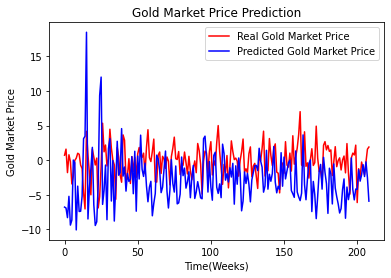

In [20]:
#Visualizing results
plt.plot(arr_test_labels, color = 'red', label = 'Real Gold Market Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Gold Market Price')
plt.title('Gold Market Price Prediction')
plt.xlabel('Time(Weeks)')
plt.ylabel('Gold Market Price')
plt.legend()
plt.show()